# Hoja de trabajo 2

El objetivo es seguir el tutorial de datacamp que se presenta en el artÃ­culo [Recurrent Neural Network Tutorial (RNN)](https://www.datacamp.com/tutorial/tutorial-for-recurrent-neural-network?irclickid=38yXsvxDXxyPUmn1yAVdyyL2UkF3bQV52yXfQA0&irgwc=1&utm_medium=affiliate&utm_source=impact&utm_campaign=000000_1-2003851_2-mix_3-all_4-na_5-na_6-na_7-mp_8-affl-ip_9-na_10-bau_11-Bing%20Rebates%20by%20Microsoft&utm_content=BANNER&utm_term=EdgeBingFlow). Debe incluir todo el cÃ³digo que se presenta. Todo el cÃ³digo debe funcionar. Adicional se le presentan algunas preguntas que debe responder segÃºn su criterio. 

Al GES debe cargar este mismo archivo con el tutorial corriendo correctamente y su respuesta a las preguntas planteadas.

MasterCard Stock Price Prediction Using LSTM & GRU

In this project, we are going to use Kaggle’s MasterCard stock dataset from May-25-2006 to Oct-11-2021 and train the LSTM and GRU models to forecast the stock price. This is a simple project-based tutorial where we will analyze data, preprocess the data to train it on advanced RNN models, and finally evaluate the results.

The project requires Pandas and Numpy for data manipulation, Matplotlib.pyplot for data visualization, scikit-learn for scaling and evaluation, and TensorFlow for modeling. We will also set seeds for reproducibility.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
from tensorflow.random import set_seed

set_seed(455)
np.random.seed(455)

# Cual es el objetivo o la utilidad de los siguientes modulos?
 * mean_squared_error
 * Dense
 * LSTM
 * Dropout
 * GRU
 * Bidirectional

##### mean_squared_error: es una métrica comúnmente utilizada en análisis de regresión para medir la media de los cuadrados de las diferencias entre los valores predichos y los valores reales. 
##### Dense: se refiere a una capa de neuronas en una red neuronal que está completamente conectada con las neuronas de la capa anterior.
##### LSTM: Red neuronal que recuerda información durante mas tiempo en secuencias de datos. 
##### Dropout: es una técnica de regularización utilizada en redes neuronales y aprendizaje profundo. Su objetivo principal es prevenir el sobreajuste o sobreentrenamiento de un modelo de aprendizaje automático.
##### GRU : están diseñadas para abordar el problema de las RNN tradicionales, que pueden tener dificultades para aprender dependencias a largo plazo debido al problema de desvanecimiento del gradiente. 
##### Bidirectional: es una extensión que permite que la información fluya en ambas direcciones a través de la secuencia de datos.


In [3]:
dataset = pd.read_csv(
    "Mastercard_stock_history.csv", index_col="Date", parse_dates=["Date"]
).drop(["Dividends", "Stock Splits"], axis=1)
print(dataset.head())


                Open      High       Low     Close     Volume
Date                                                         
2006-05-25  3.748967  4.283869  3.739664  4.279217  395343000
2006-05-26  4.307126  4.348058  4.103398  4.179680  103044000
2006-05-30  4.183400  4.184330  3.986184  4.093164   49898000
2006-05-31  4.125723  4.219679  4.125723  4.180608   30002000
2006-06-01  4.179678  4.474572  4.176887  4.419686   62344000


# Explique en sus propias palabras a que se refiere "data/Mastercard_stock_history.csv" dentro del código anterior.

Se refiere a un conjunto de datos almacenado en formato CSV que contiene el historial de precios de las acciones de la empresa Mastercard.

The .describe() function helps us analyze the data in depth. Let’s focus on the High column as we are going to use it to train the model. We can also choose Close or Open columns for a model feature, but High makes more sense as it provides us information of how high the values of the share went on the given day.

The minimum stock price is $4.10, and the highest is $400.5. The mean is at $105.9 and the standard deviation $107.3, which means that stocks have high variance.

In [4]:
print(dataset.describe())

              Open         High          Low        Close        Volume
count  3872.000000  3872.000000  3872.000000  3872.000000  3.872000e+03
mean    104.896814   105.956054   103.769349   104.882714  1.232250e+07
std     106.245511   107.303589   105.050064   106.168693  1.759665e+07
min       3.748967     4.102467     3.739664     4.083861  6.411000e+05
25%      22.347203    22.637997    22.034458    22.300391  3.529475e+06
50%      70.810079    71.375896    70.224002    70.856083  5.891750e+06
75%     147.688448   148.645373   146.822013   147.688438  1.319775e+07
max     392.653890   400.521479   389.747812   394.685730  3.953430e+08


By using .isna().sum() we can determine the missing values in the dataset. It seems that the dataset has no missing values.

In [5]:
dataset.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

The train_test_plot function takes three arguments: dataset, tstart, and tend and plots a simple line graph. The tstart and tend are time limits in years. We can change these arguments to analyze specific periods. The line plot is divided into two parts: train and test. This will allow us to decide the distribution of the test dataset.

MasterCard stock prices have been on the rise since 2016. It had a dip in the first quarter of 2020 but it gained a stable position in the latter half of the year. Our test dataset consists of one year, from 2021 to 2022, and the rest of the dataset is used for training.

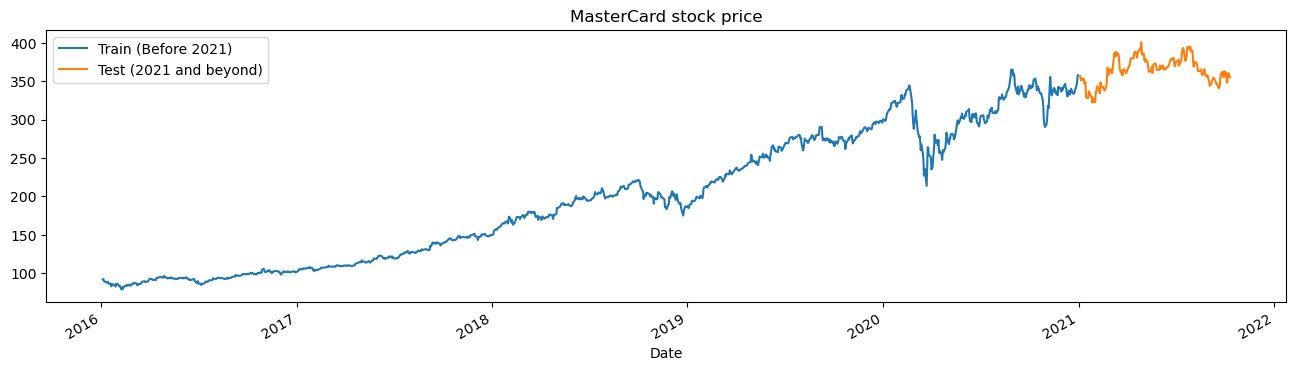

In [6]:
tstart = 2016
tend = 2020

def train_test_plot(dataset, tstart, tend):
    dataset.loc[f"{tstart}":f"{tend}", "High"].plot(figsize=(16, 4), legend=True)
    dataset.loc[f"{tend+1}":, "High"].plot(figsize=(16, 4), legend=True)
    plt.legend([f"Train (Before {tend+1})", f"Test ({tend+1} and beyond)"])
    plt.title("MasterCard stock price")
    plt.show()

train_test_plot(dataset,tstart,tend)

# Considere la función train_test_plot como un todo (no linea por linea) y explique lo siguiente
# * Que recibe?
# * Que hace?
# * Que devuelve?

¿Qué recibe? Los Parametros siguientes: 
dataset: Conjunto de datos (Mastercard_stock_history.csv)
tstart: Año de inicio para visualizar los datos.
tend: Año final para visualizar los datos de entrenamiento.

¿Qué hace?
Divide los datos en entrenamiento y prueba el precio de las acciones contenidas en el data set. Divide según la entrada que se le indico. 

¿Qué devuelve?
Un gráfico de los precios de las acciones en los períodos especificados en tstart y tend.


Data Preprocessing

The train_test_split function divides the dataset into two subsets: training_set and test_set.

In [10]:
def train_test_split(dataset, tstart, tend):
    train = dataset.loc[f"{tstart}":f"{tend}", "High"].values
    test = dataset.loc[f"{tend+1}":, "High"].values
    return train, test
training_set, test_set = train_test_split(dataset, tstart, tend)

# Considere la función train_test_split como un todo (no línea por línea) y explique lo siguiente
# * Que recibe?
# * Que hace?
# * Que devuelve?


¿Qué recibe? Los parametros siguiente:
El año que se desea entrenar y el limite de año donde se desea finalizar para data de entrenamiento. 

¿Qué hace?
Dos subconjuntos: uno para entrenamiento y otro para prueba.

¿Qué devuelve?
Los dos conjunto antes mencionados train y test que son los conjuntos que se estarán utilizando en los pasos posteriores, los inicios y limites de ambos conjuntos fueron definidos en la entrada de la función. 


We will use the MinMaxScaler function to standardize our training set, which will help us avoid the outliers or anomalies. You can also try using StandardScaler or any other scalar function to normalize your data and improve model performance.

In [11]:
sc = MinMaxScaler(feature_range=(0, 1))
training_set = training_set.reshape(-1, 1)
training_set_scaled = sc.fit_transform(training_set)

The split_sequence function uses a training dataset and converts it into inputs (X_train) and outputs (y_train).

For example, if the sequence is [1,2,3,4,5,6,7,8,9,10,11,12] and the n_step is three, then it will convert the sequence into three input timestamps and one output as shown below:

In this project, we are using 60 n_steps. We can also reduce or increase the number of steps to optimize model performance.

In [13]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)


n_steps = 60
features = 1
# split into samples
X_train, y_train = split_sequence(training_set_scaled, n_steps)

# Considere la función split_sequence como un todo (no línea por línea) y explique lo siguiente
# * Que recibe?
# * Que hace?
# * Que devuelve?


¿Qué recibe? Los parámetros principales:
sequence: que es una serie de datos.
n_steps: Es una cifra que nos indica cuántos elementos de la secuencia se usarán para predecir el siguiente.

¿Qué hace? La función se encarga de tomar la secuencia y segmentarla en múltiples partes.

¿Qué devuelve? Dos listas:
X: Almacena las partes de la secuencia, cada una con n_steps elementos.
y: Contiene los valores que se quieren predecir para cada parte en X.


We are working with univariate series, so the number of features is one, and we need to reshape the X_train to fit on the LSTM model. The X_train has [samples, timesteps], and we will reshape it to [samples, timesteps, features].

In [14]:
# Reshaping X_train for model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],features)

LSTM Model

The model consists of a single hidden layer of LSTM and an output layer. You can experiment with the number of units, as more units will give you better results. For this experiment, we will set LSTM units to 125, tanh as activation, and set input size.

Author’s Note: Tensorflow library is user-friendly, so we don't have to create LSTM or GRU models from scratch. We will simply use the LSTM or GRU modules to construct the model.

Finally, we will compile the model with an RMSprop optimizer and mean square error as a loss function.

In [19]:
# The LSTM architecture
model_lstm = Sequential()
model_lstm.add(LSTM(units=125, activation="tanh", input_shape=(n_steps, features)))
model_lstm.add(Dense(units=1))
# Compiling the model
model_lstm.compile(optimizer="RMSprop", loss="mse")

model_lstm.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 125)               63500     
                                                                 
 dense_3 (Dense)             (None, 1)                 126       
                                                                 
Total params: 63626 (248.54 KB)
Trainable params: 63626 (248.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Cual es la arquitectura del modelo que se va usar?

El modelo es una red neuronal recurrente con una capa LSTM de 125 unidades y utiliza "tanh" como función de activación en la capa LSTM. El tamaño de entrada debe coincidir con lo que se ha definido anteriormente. Durante el entrenamiento, se utilizará el optimizador RMSprop y se minimizará el error cuadrático medio.


The model will train on 50 epochs with 32 batch sizes. You can change the hyperparameters to reduce training time or improve the results. The model training was successfully completed with the best possible loss.

In [21]:
model_lstm.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
38/38 [==============================] - 5s 59ms/step - loss: 0.0114
Epoch 2/50
38/38 [==============================] - 2s 63ms/step - loss: 0.0026
Epoch 3/50
38/38 [==============================] - 2s 65ms/step - loss: 0.0021
Epoch 4/50
38/38 [==============================] - 3s 72ms/step - loss: 0.0018
Epoch 5/50
38/38 [==============================] - 3s 82ms/step - loss: 0.0014
Epoch 6/50
38/38 [==============================] - 3s 81ms/step - loss: 0.0014
Epoch 7/50
38/38 [==============================] - 3s 75ms/step - loss: 8.7558e-04
Epoch 8/50
38/38 [==============================] - 3s 70ms/step - loss: 0.0012
Epoch 9/50
38/38 [==============================] - 3s 71ms/step - loss: 9.1797e-04
Epoch 10/50
38/38 [==============================] - 3s 85ms/step - loss: 9.8707e-04
Epoch 11/50
38/38 [==============================] - 3s 77ms/step - loss: 7.7798e-04
Epoch 12/50
38/38 [==============================] - 3s 76ms/step - loss: 7.7327e-04
Epoch 13/50
38/38

Results

We are going to repeat preprocessing and normalize the test set. First of all we will transform then split the dataset into samples, reshape it, predict, and inverse transform the predictions into standard form.

In [22]:
dataset_total = dataset.loc[:,"High"]
inputs = dataset_total[len(dataset_total) - len(test_set) - n_steps :].values
inputs = inputs.reshape(-1, 1)
#scaling
inputs = sc.transform(inputs)

# Split into samples
X_test, y_test = split_sequence(inputs, n_steps)
# reshape
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], features)
#prediction
predicted_stock_price = model_lstm.predict(X_test)
#inverse transform the values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

7/7 [==============================] - 1s 23ms/step


The plot_predictions function will plot a real versus predicted line chart. This will help us visualize the difference between actual and predicted values.

The return_rmse function takes in test and predicted arguments and prints out the root mean square error (rmse) metric.

In [24]:
def plot_predictions(test, predicted):
    plt.plot(test, color="gray", label="Real")
    plt.plot(predicted, color="red", label="Predicted")
    plt.title("MasterCard Stock Price Prediction")
    plt.xlabel("Time")
    plt.ylabel("MasterCard Stock Price")
    plt.legend()
    plt.show()


def return_rmse(test, predicted):
    rmse = np.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {:.2f}.".format(rmse))

# Considere la función return_rmse como un todo (no línea por línea) y explique lo siguiente
# * Que recibe?
# * Que hace?
# * Que devuelve?


¿Qué recibe? 2 argumentos;
test: Son los valores reales o esperados. 
predicted: Valores que el modelo ha predicho.

¿Qué hace? Calcula el error cuadrático medio entre los valores reales (test) y los valores predichos (predicted), posterior saca la raíz cuadrada de este error para obtener el RMSE.

¿Qué devuelve? El RMSE con un formato de dos decimales. Es decir, nos indica qué tan cerca o lejos están las predicciones del modelo de los valores reales.


According to the line plot below, the single-layered LSTM model has performed well.

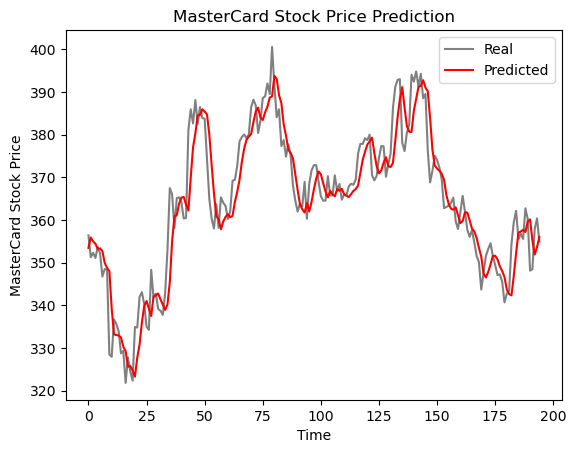

In [25]:
plot_predictions(test_set,predicted_stock_price)

The results look promising as the model got 6.70 rmse on the test dataset.

In [26]:
return_rmse(test_set,predicted_stock_price)

The root mean squared error is 6.26.


# Según el grafico y el RMSE, considera aceptable el modelo? 
# Si hoy es la fecha límite para el proyecto y este ha sido su mejor modelo, lo pondría en producción? explique


Dado el rendimiento actual del modelo, el autor sugiere que podría ser una opción viable para ponerlo en producción 

El RMSE es del  6.26 y, según el gráfico, la línea de predicción sigue de cerca a la línea real y capta los patrones decentemente, trata de seguir las lineas reales. Es aceptable.  

GRU Model

We are going to keep everything the same and just replace the LSTM layer with the GRU layer to properly compare the results. The model structure contains a single GRU layer with 125 units and an output layer.

In [27]:
model_gru = Sequential()
model_gru.add(GRU(units=125, activation="tanh", input_shape=(n_steps, features)))
model_gru.add(Dense(units=1))
# Compiling the RNN
model_gru.compile(optimizer="RMSprop", loss="mse")

model_gru.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 125)               48000     
                                                                 
 dense_4 (Dense)             (None, 1)                 126       
                                                                 
Total params: 48126 (187.99 KB)
Trainable params: 48126 (187.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Cual es la arquitectura del modelo que se va usar?

El segundo modelo es una red neuronal recurrente con una capa GRU de 125 unidades y utiliza "tanh" como función de activación en la capa GRU. Al igual que el primer modelo, el tamaño de entrada debe coincidir con lo que se ha definido anteriormente. Durante el entrenamiento, se utilizará el optimizador RMSprop y se minimizará el error cuadrático medio.

The model has successfully trained with 50 epochs and a batch size of 32.

In [28]:
model_gru.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
38/38 [==============================] - 6s 61ms/step - loss: 0.0113
Epoch 2/50
38/38 [==============================] - 3s 70ms/step - loss: 0.0015
Epoch 3/50
38/38 [==============================] - 3s 67ms/step - loss: 0.0013
Epoch 4/50
38/38 [==============================] - 3s 71ms/step - loss: 0.0012
Epoch 5/50
38/38 [==============================] - 3s 73ms/step - loss: 8.8269e-04
Epoch 6/50
38/38 [==============================] - 2s 66ms/step - loss: 0.0010
Epoch 7/50
38/38 [==============================] - 2s 58ms/step - loss: 7.0271e-04
Epoch 8/50
38/38 [==============================] - 2s 61ms/step - loss: 7.6593e-04
Epoch 9/50
38/38 [==============================] - 2s 65ms/step - loss: 6.7469e-04
Epoch 10/50
38/38 [==============================] - 3s 66ms/step - loss: 7.5449e-04
Epoch 11/50
38/38 [==============================] - 3s 74ms/step - loss: 6.3348e-04
Epoch 12/50
38/38 [==============================] - 3s 70ms/step - loss: 5.9395e-04
Epoch 13/

Results

As we can see, the real and predicted values are relatively close. The predicted line chart almost fits the actual values.

7/7 [==============================] - 1s 19ms/step


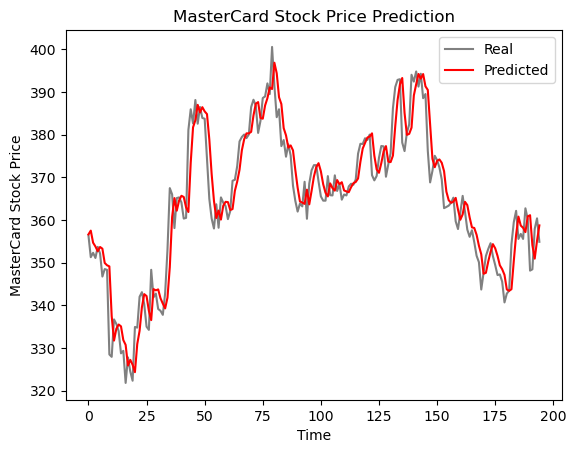

In [29]:
GRU_predicted_stock_price = model_gru.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)
plot_predictions(test_set, GRU_predicted_stock_price)

GRU model got 5.50 rmse on the test dataset, which is an improvement from the LSTM model.

In [30]:
return_rmse(test_set,GRU_predicted_stock_price)

The root mean squared error is 5.79.


# Según el grafico y el RMSE, considera aceptable el modelo? 
# Si hoy es la fecha límite para el proyecto y este ha sido su mejor modelo, lo pondría en producción? explique


Dado el desempeño notoriamente superior al compararlo con el modelo LSTM y el hecho de que la predicción sigue de cerca la línea real y capta los patrones, se sugiere seriamente considerar poner este modelo en producción, especialmente si se trata de dinero

El RMSE es del  5.79 y, según el gráfico, la línea de predicción sigue de cerca a la línea real y capta los patrones, entonces el modelo parece ser razonablemente preciso y aceptable.  
